In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import warnings 
df=pd.read_csv("Equity-TATAGLOBAL.csv",parse_dates=True)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade,Volume
0,20-01-15,156.80,157.45,155.60,156.80,156.35,11284,1211357
1,21-01-15,157.40,159.40,156.65,158.00,158.00,19549,2696995
2,22-01-15,157.10,160.60,157.10,159.05,158.85,18186,2326838
3,23-01-15,159.15,162.15,156.90,160.50,161.15,15494,2437301
4,27-01-15,161.00,162.00,158.60,159.30,159.40,16325,1634586


In [3]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format = ('%d-%m-%y'))
indexed_df = df.set_index('Date')
indexed_df.head()

,Open,High,Low,Last,Close,Total Trade,Volume
Date,,,,,,,
2015-01-20,156.80,157.45,155.60,156.80,156.35,11284,1211357
2015-01-21,157.40,159.40,156.65,158.00,158.00,19549,2696995
2015-01-22,157.10,160.60,157.10,159.05,158.85,18186,2326838
2015-01-23,159.15,162.15,156.90,160.50,161.15,15494,2437301
2015-01-27,161.00,162.00,158.60,159.30,159.40,16325,1634586


In [3]:
#indexed_df.resample('M')["Close"].sum()

C:\Users\namra\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


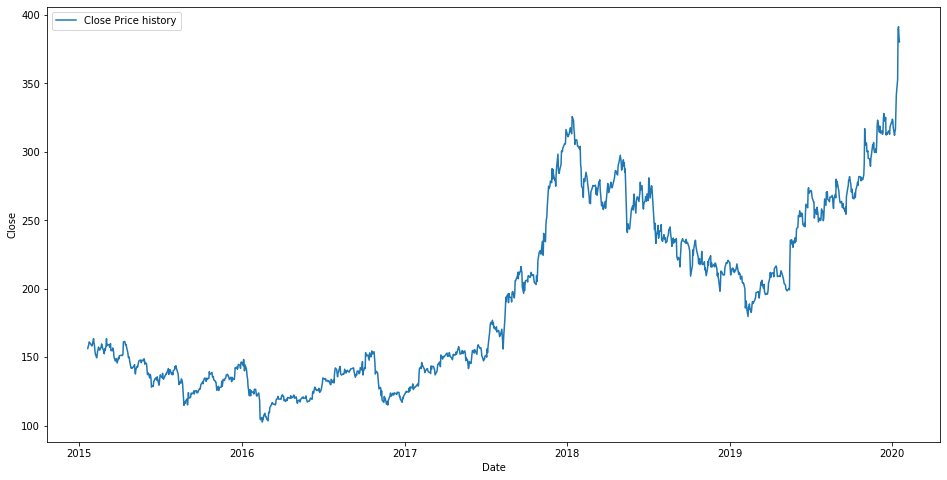

In [4]:
#plot
plt.figure(figsize=(16,8))
plt.plot(indexed_df['Close'], label='Close Price history')
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.show()

SPLITTING OF DATASET INTO TRAINING AND VALIDATION SET

C:\Users\namra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\namra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


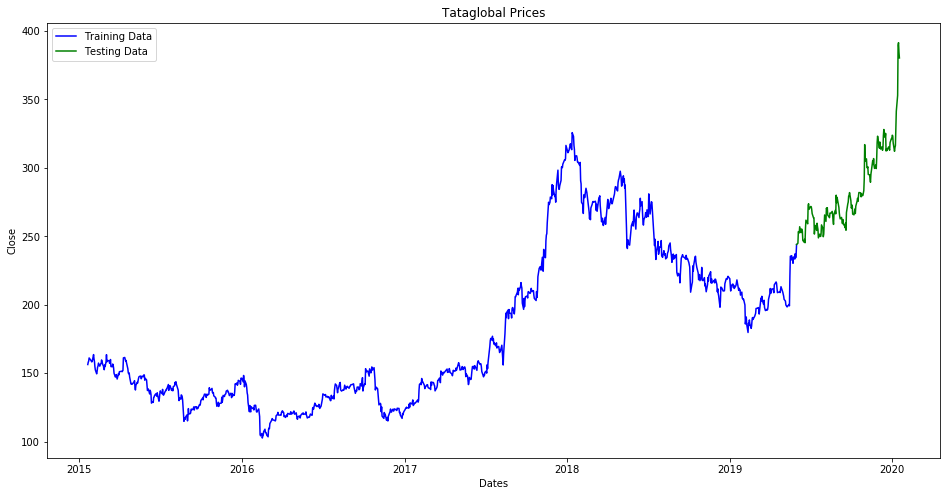

In [5]:
train=indexed_df.sort_index().ix['2015-01-20':'2019-05-31'] 
valid=indexed_df.sort_index().ix['2019-05-31':'2020-01-17']

plt.figure(figsize=(16,8))
plt.title('Tataglobal Prices')
plt.xlabel('Dates')
plt.ylabel('Close')
plt.plot(train['Close'],'blue', label ='Training Data')
plt.plot(valid['Close'],'green',label='Testing Data')
plt.legend()

In [6]:
train

,Open,High,Low,Last,Close,Total Trade,Volume
Date,,,,,,,
2015-01-20,156.80,157.45,155.60,156.80,156.35,11284,1211357
2015-01-21,157.40,159.40,156.65,158.00,158.00,19549,2696995
2015-01-22,157.10,160.60,157.10,159.05,158.85,18186,2326838
2015-01-23,159.15,162.15,156.90,160.50,161.15,15494,2437301
2015-01-27,161.00,162.00,158.60,159.30,159.40,16325,1634586
...,...,...,...,...,...,...,...
2019-05-27,237.20,237.50,232.25,233.50,233.40,13532,1832951
2019-05-28,235.40,243.75,233.75,236.75,237.30,45497,4121336
2019-05-29,236.90,239.90,232.40,234.25,234.35,19425,2445735


In [7]:
train['Close'].values

array([156.35, 158.  , 158.85, ..., 234.35, 236.85, 244.  ])

In [8]:
train.head()

,Open,High,Low,Last,Close,Total Trade,Volume
Date,,,,,,,
2015-01-20,156.80,157.45,155.60,156.80,156.35,11284,1211357
2015-01-21,157.40,159.40,156.65,158.00,158.00,19549,2696995
2015-01-22,157.10,160.60,157.10,159.05,158.85,18186,2326838
2015-01-23,159.15,162.15,156.90,160.50,161.15,15494,2437301
2015-01-27,161.00,162.00,158.60,159.30,159.40,16325,1634586


In [9]:
valid.head()

,Open,High,Low,Last,Close,Total Trade,Volume
Date,,,,,,,
2019-05-31,237.0,246.25,235.35,244.70,244.00,51743,6568324
2019-06-03,245.0,247.40,242.30,244.95,244.95,33750,3279574
2019-06-04,244.6,258.70,244.00,253.80,253.45,89627,10943654
2019-06-06,253.0,257.40,246.75,250.25,252.50,52419,5822991
2019-06-07,251.5,259.85,247.65,256.80,257.00,43480,6012221


#### PARAMETER TUNING FOR ARIMA MODEL

#### STATIONARITY CHECK

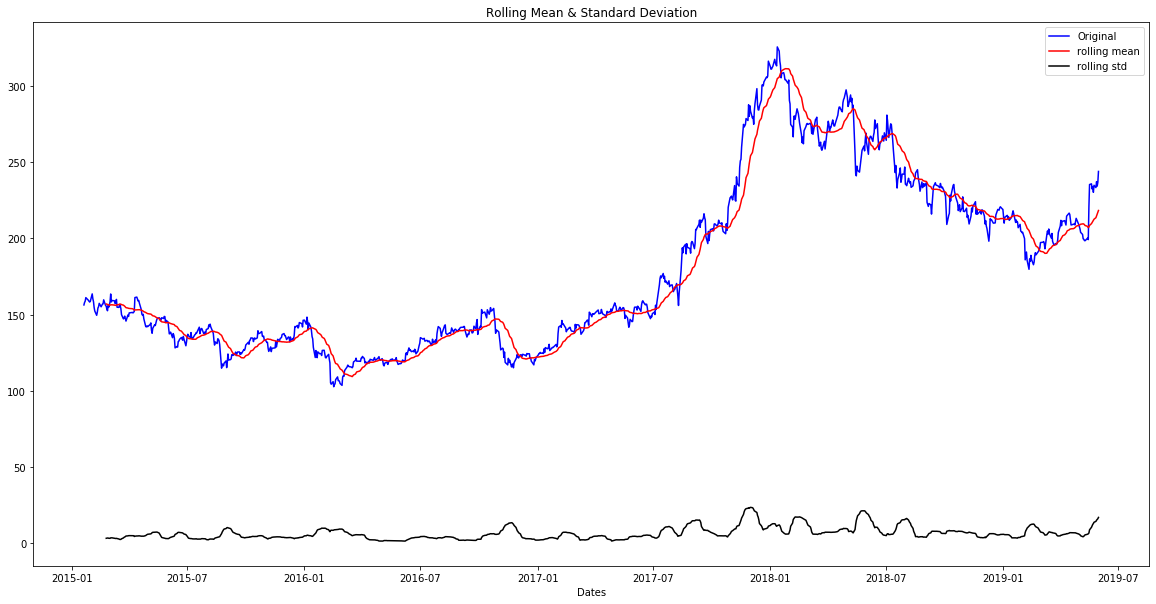

Results of Dickey-Fuller Test:
Test Statistic                   -0.889618
p-value                           0.791372
#Lags Used                        0.000000
Number of Observations Used    1078.000000
Critical value (1%)              -3.436431
Critical value (5%)              -2.864225
Critical value (10%)             -2.568200
dtype: float64


In [10]:
def test_stationarity(timeseries):
    rolmean = pd.Series(timeseries).rolling(window=24).mean()
    rolstd = pd.Series(timeseries).rolling(window=24).std()
    orig = plt.plot(timeseries,color = 'blue', label ='Original')
    mean = plt.plot(rolmean, color = 'red', label ='rolling mean')
    std  = plt.plot(rolstd, color='black', label = 'rolling std')
    plt.legend(loc ='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Dates')
    plt.show(block = False)

    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest =adfuller(timeseries, autolag='AIC')
    dfoutput =pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

test_stationarity(train['Close'])

#### REMOVING TREND

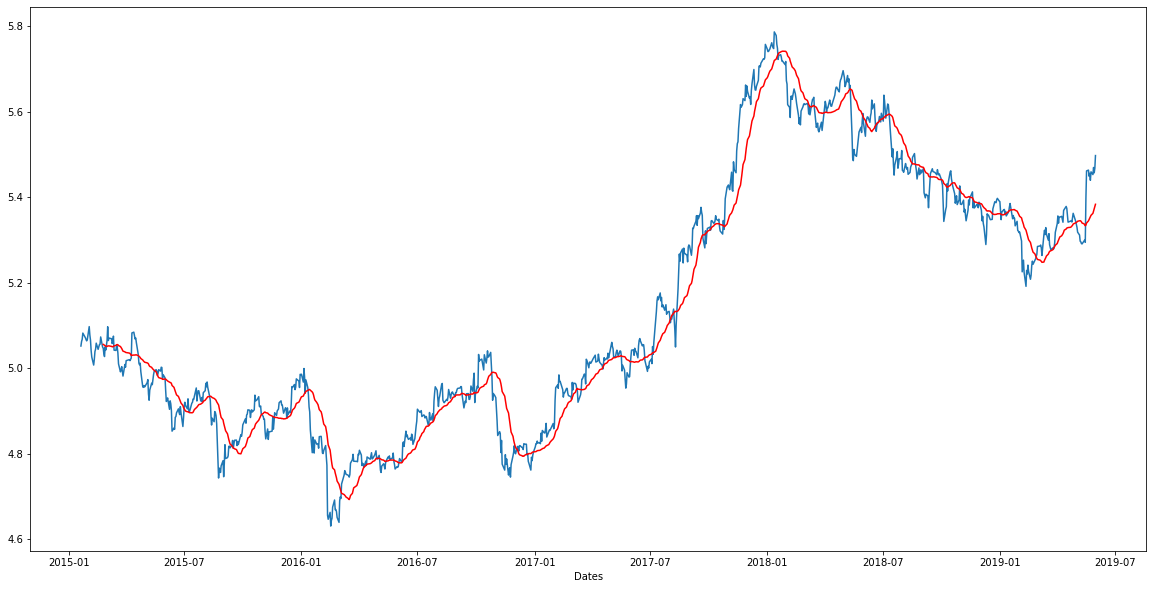

In [11]:
train_log = np.log(train['Close'])
valid_log = np.log(valid['Close'])
plt.xlabel('Dates')

train_moving_avg = train_log.rolling(24).mean()
valid_moving_avg = valid_log.rolling(24).mean()
plt.plot(train_log)
plt.plot(train_moving_avg, color = 'red')
plt.show()

In [12]:
train_log.values

array([5.05209708, 5.06259503, 5.06796036, ..., 5.45681572, 5.46742703,
       5.49716823])

In [13]:
train_moving_avg.values

array([       nan,        nan,        nan, ..., 5.37204676, 5.3772789 ,
       5.38329401])

In [14]:
train_log_moving_avg_diff = train_log - train_moving_avg
valid_log_moving_avg_diff = valid_log - valid_moving_avg

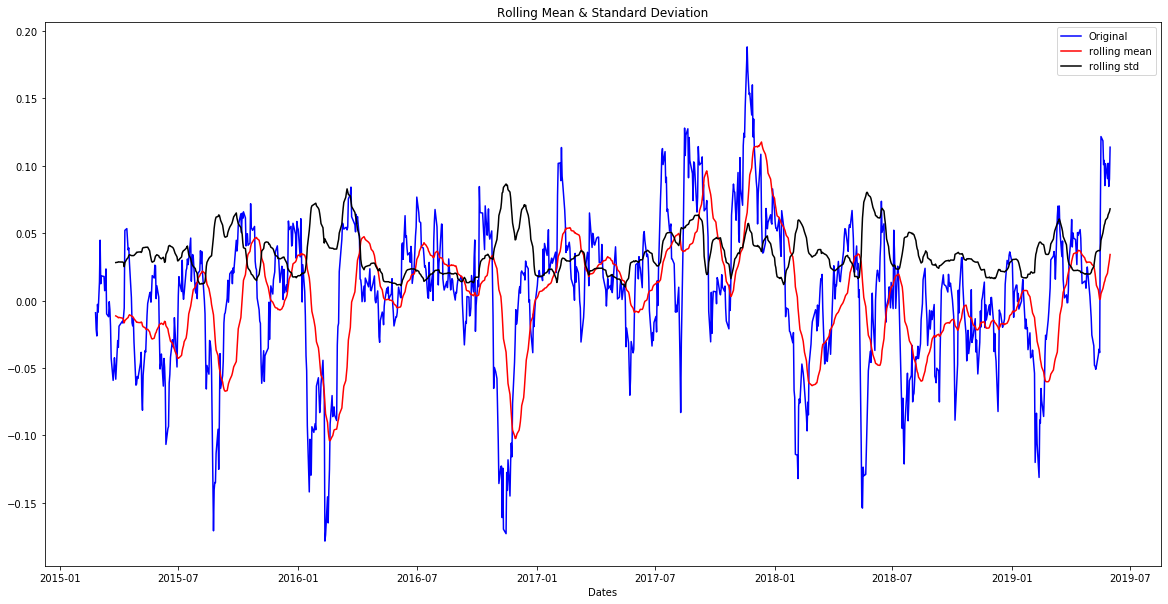

Results of Dickey-Fuller Test:
Test Statistic                -6.361042e+00
p-value                        2.474117e-08
#Lags Used                     3.000000e+00
Number of Observations Used    1.052000e+03
Critical value (1%)           -3.436581e+00
Critical value (5%)           -2.864291e+00
Critical value (10%)          -2.568235e+00
dtype: float64


In [15]:
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

In [16]:
train_log_moving_avg_diff.values

array([-0.008938  , -0.02143814, -0.02618369, ...,  0.08476896,
        0.09014813,  0.11387421])

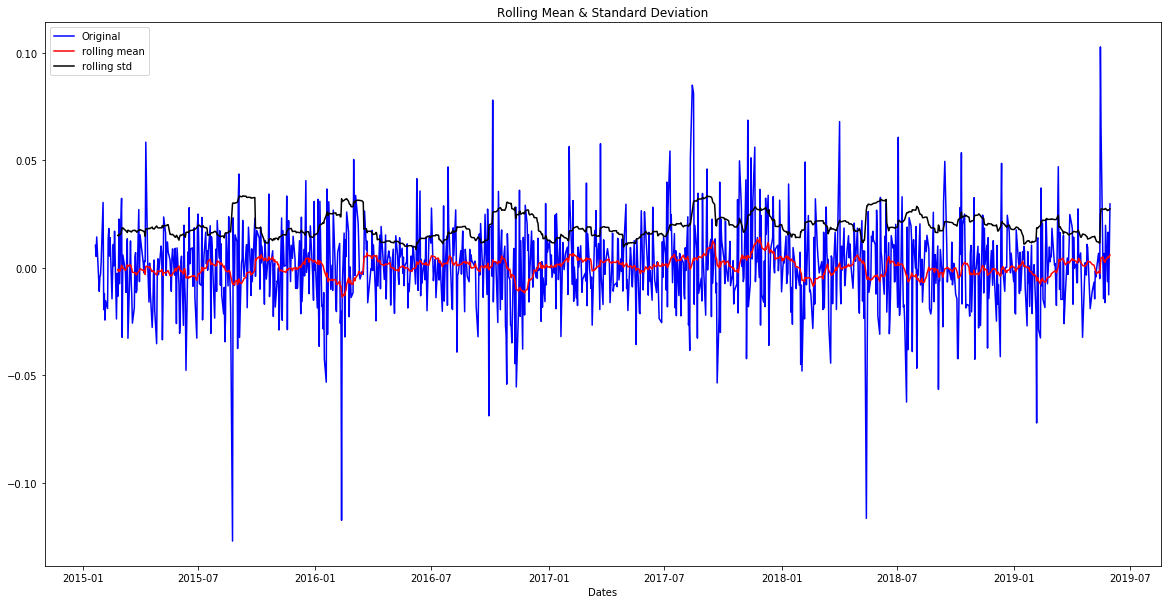

Results of Dickey-Fuller Test:
Test Statistic                  -33.185754
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1077.000000
Critical value (1%)              -3.436436
Critical value (5%)              -2.864227
Critical value (10%)             -2.568201
dtype: float64


In [17]:
train_log_diff = (train_log - train_log.shift(1)).dropna()
plt.xlabel('Dates')
test_stationarity(train_log_diff)

#train_log_diff.values
valid_log_diff =(valid_log - valid_log.shift(1)).dropna()

##### REMOVING SEASONALITY

C:\Users\namra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


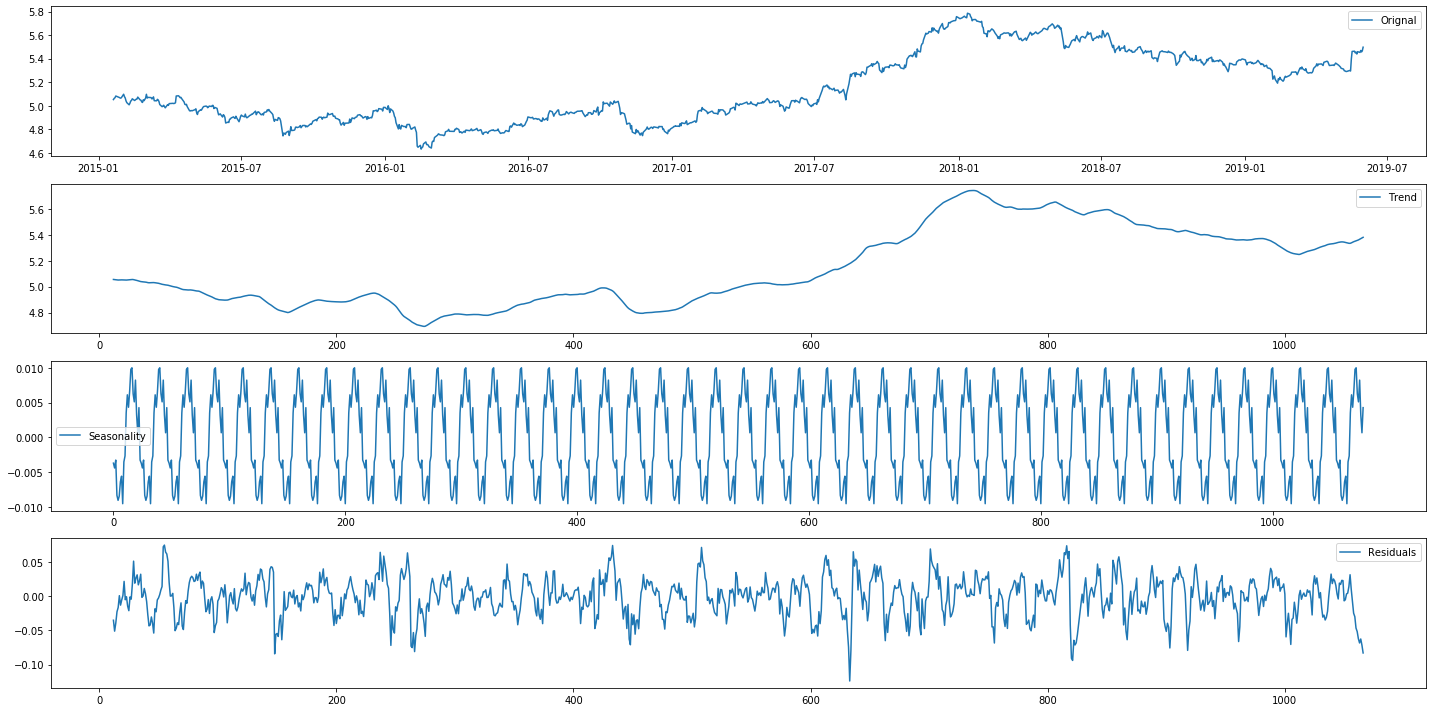

In [18]:
decomposition = seasonal_decompose(pd.DataFrame(train_log).Close.values, freq = 24)

trend= decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_log, label ='Orignal')
plt.legend(loc ='best')

plt.subplot(412)
plt.plot(trend , label='Trend')
plt.legend(loc ='best')

plt.subplot(413)
plt.plot(seasonal , label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## STATIONARITY OF RESIDUALS

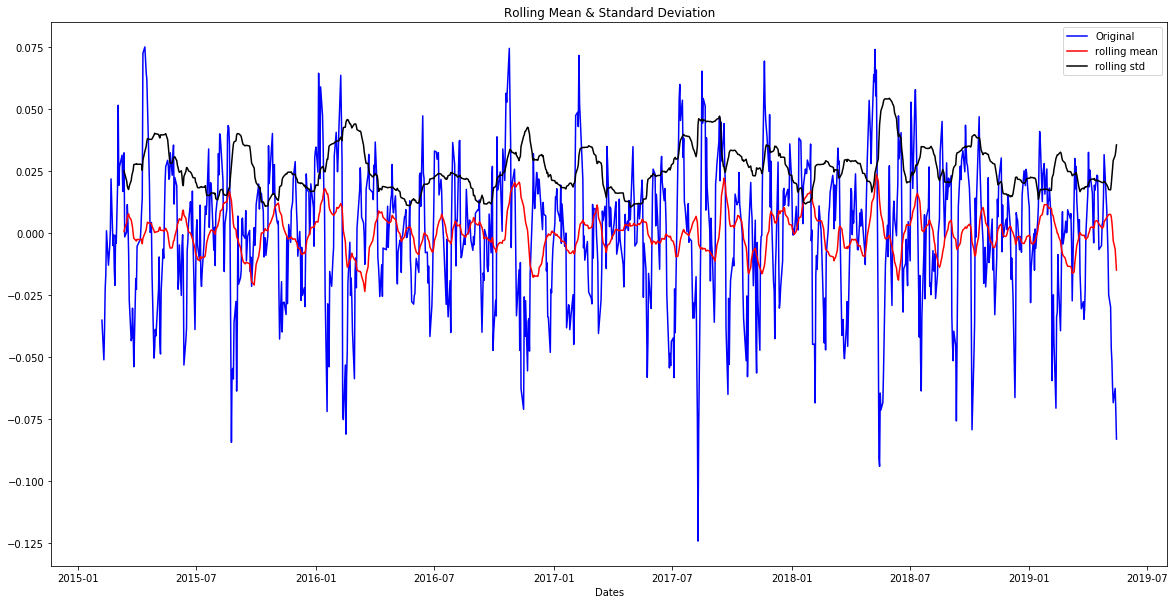

Results of Dickey-Fuller Test:
Test Statistic                -9.909236e+00
p-value                        3.201862e-17
#Lags Used                     1.900000e+01
Number of Observations Used    1.035000e+03
Critical value (1%)           -3.436684e+00
Critical value (5%)           -2.864337e+00
Critical value (10%)          -2.568259e+00
dtype: float64


In [19]:
train_log_decompose =pd.DataFrame(residual)
train_log_decompose['Date'] =train_log.index
train_log_decompose.set_index('Date' , inplace = True)
train_log_decompose.dropna(inplace = True)
plt.xlabel('Dates')
test_stationarity(train_log_decompose[0])

##### FORECASTING THE TIME SERIES USING ARIMA

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


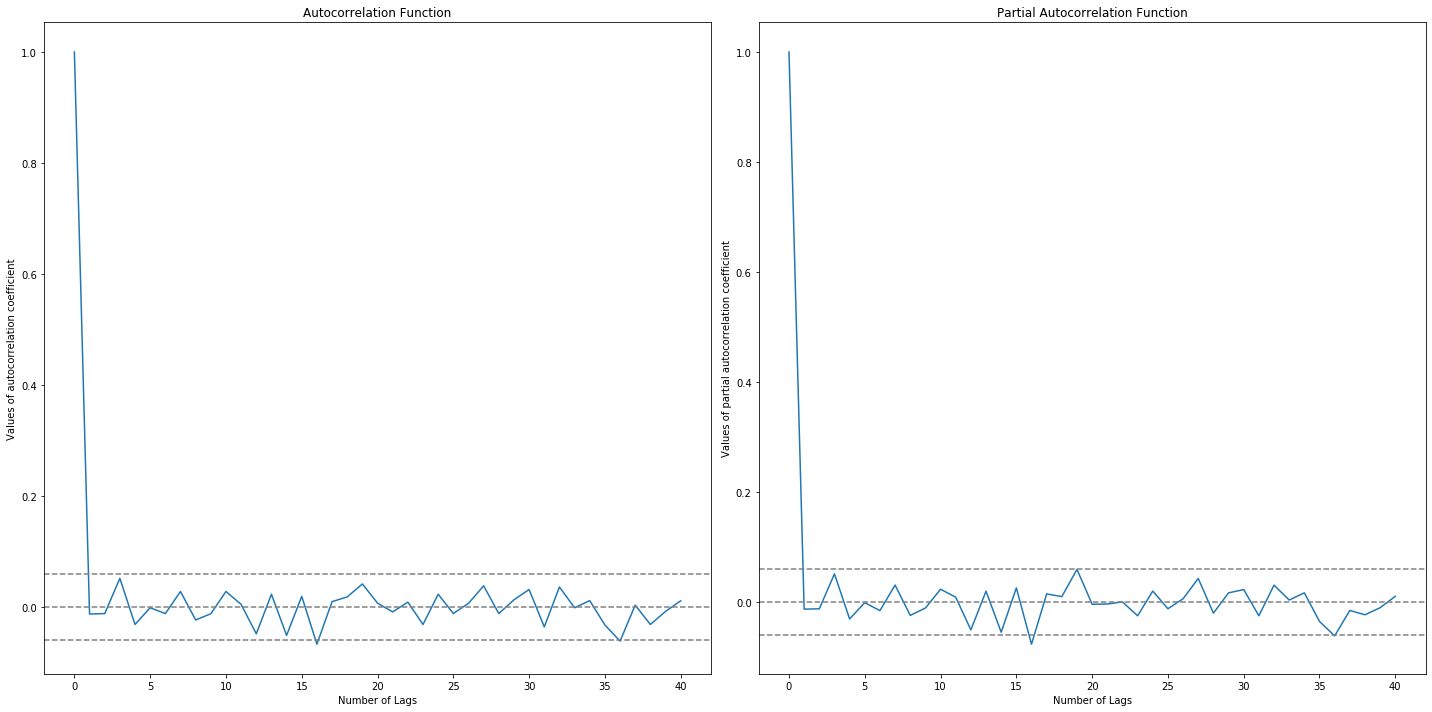

In [20]:
lag_acf = acf(train_log_diff, nlags = 40)
lag_pacf = pacf(train_log_diff, nlags = 40 ,method ='ols')


#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('Number of Lags')
plt.ylabel('Values of autocorrelation coefficient')
plt.tight_layout()

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of Lags')
plt.ylabel('Values of partial autocorrelation coefficient')
plt.tight_layout()

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


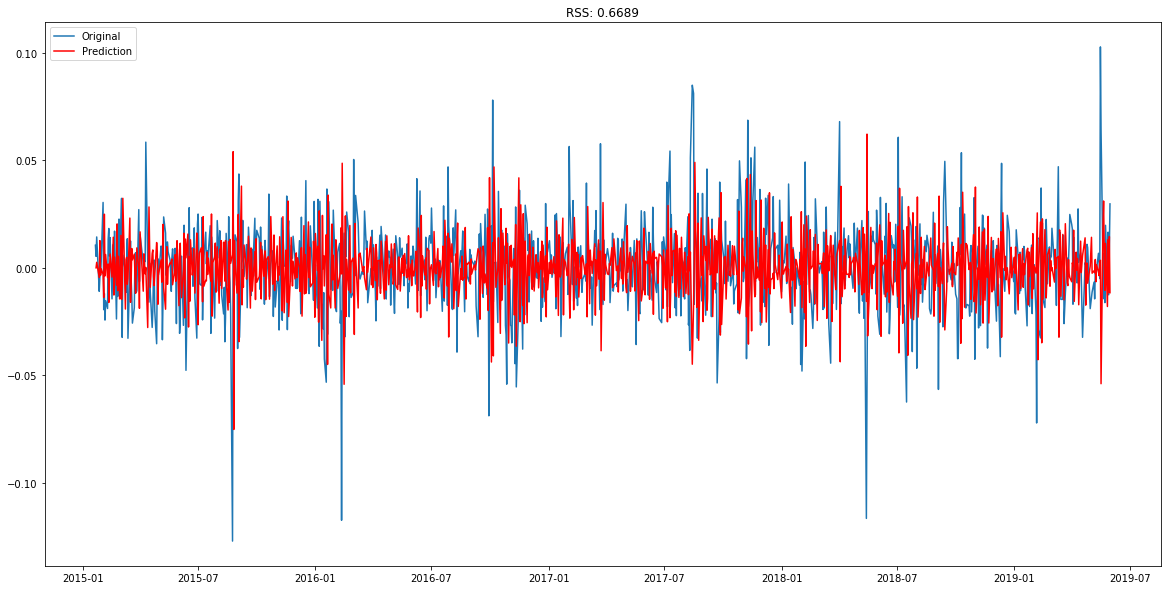

In [21]:
# AR Model
model = ARIMA(train_log_diff, order=(1, 1, 0))
results_AR = model.fit(disp = -1)
plt.plot(train_log_diff, label ='Original')
plt.plot(results_AR.fittedvalues, color = 'red' , label ='Prediction')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-train_log_diff).dropna()**2))
print('Plotting AR model')
plt.legend(loc ='best')
plt.show()

In [22]:
results_AR.fittedvalues-train_log_diff

Date
2015-01-21         NaN
2015-01-22   -0.005352
2015-01-23   -0.011789
2015-01-27    0.006434
2015-01-28    0.016753
                ...   
2019-05-27   -0.011538
2019-05-28   -0.003459
2019-05-29    0.001041
2019-05-30    0.003949
2019-05-31   -0.041281
Length: 1078, dtype: float64

In [23]:
#plt.plot(results_AR.fittedvalues, color = 'red' , label ='Prediction')

In [24]:
#import datetime 
#start_date=datetime.datetime(2015,1,24).date()
#end_date=datetime.datetime(2019,4,30).date()

In [25]:
#start_date

In [26]:
valid_log_diff.shape

(155,)

In [27]:
AR_predict=results_AR.predict(1078,1233)
AR_predict.shape

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


(156,)

In [28]:
AR_predict.index=valid_log.index
AR_predict

Date
2019-05-31   -0.009545
2019-06-03    0.004793
2019-06-04   -0.002376
2019-06-06    0.001208
2019-06-07   -0.000584
                ...   
2020-01-13    0.000014
2020-01-14    0.000014
2020-01-15    0.000014
2020-01-16    0.000014
2020-01-17    0.000014
Length: 156, dtype: float64

Plotting AR model


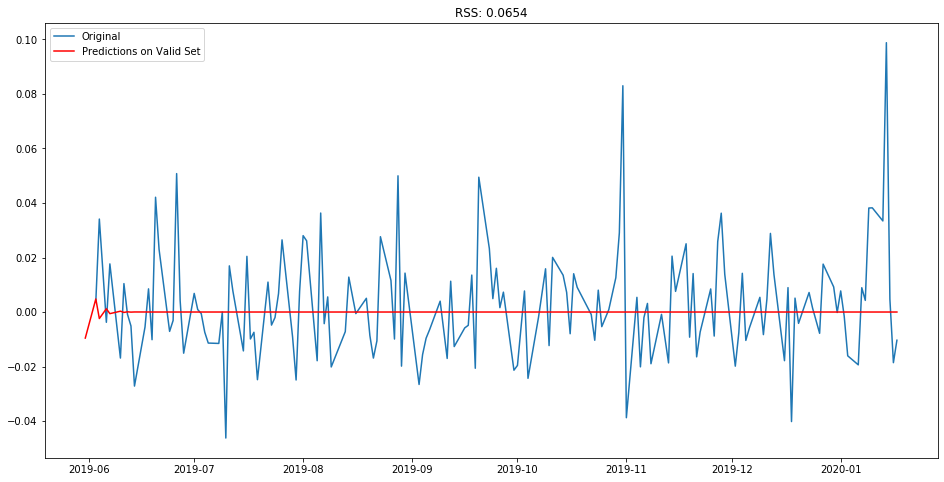

In [29]:
plt.figure(figsize=(16,8))
plt.plot(valid_log_diff, label ='Original')
plt.plot(AR_predict, color='red',label = 'Predictions on Valid Set')
plt.title('RSS: %.4f'% sum((AR_predict-valid_log_diff).dropna()**2))
print('Plotting AR model')
plt.legend(loc ='best')

In [30]:
from scipy.stats.distributions import chi2 
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR =(2*(L2-L1))
    P = chi2.sf(LR,DF).round(3)
    return P

In [32]:
from statsmodels.tsa.arima_model import ARMA
model_ar = ARMA(train_log_diff , order=(1,0))
results_ar_1 =model_ar.fit()
print(results_ar_1.summary())
print("LLR TEST:" +str(LLR_test(model_ar,model_ar_1)))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1078
Model:                     ARMA(1, 0)   Log Likelihood                2671.329
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5336.657
Time:                        15:25:59   BIC                          -5321.709
Sample:                             0   HQIC                         -5330.996
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.001      0.676      0.499      -0.001       0.002
ar.L1.Close    -0.0129      0.030     -0.424      0.672      -0.073       0.047
                                    Roots       

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [33]:
model_ar_2 = ARMA(train_log_diff , order=(2,0))
results_ar_2 =model_ar_2.fit()
print(results_ar_2.summary())
print("LLR TEST:" +str(LLR_test(model_ar_1,model_ar_2)))

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1078
Model:                     ARMA(2, 0)   Log Likelihood                2671.410
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5334.820
Time:                        15:26:24   BIC                          -5314.889
Sample:                             0   HQIC                         -5327.273
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.001      0.683      0.495      -0.001       0.002
ar.L1.Close    -0.0131      0.030     -0.430      0.667      -0.073       0.047
ar.L2.Close    -0.0123      0.030     -0.404    

In [34]:
model_ar_3 = ARMA(train_log_diff, order=(3,0))
results_ar_3 = model_ar_3.fit()
print(results_ar_3.summary())
print("LLR TEST:" +str(LLR_test(model_ar_2,model_ar_3)))

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1078
Model:                     ARMA(3, 0)   Log Likelihood                2672.817
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5335.635
Time:                        15:26:24   BIC                          -5310.721
Sample:                             0   HQIC                         -5326.200
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.001      0.653      0.514      -0.001       0.002
ar.L1.Close    -0.0125      0.030     -0.410      0.681      -0.072       0.047
ar.L2.Close    -0.0116      0.030     -0.381    

In [35]:
model_ar_4 = ARMA(train_log_diff , order=(4,0))
results_ar_4 =model_ar_4.fit()
print(results_ar_4.summary())
print("LLR TEST:" +str(LLR_test(model_ar_3,model_ar_4)))

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1078
Model:                     ARMA(4, 0)   Log Likelihood                2673.324
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5334.648
Time:                        15:26:25   BIC                          -5304.751
Sample:                             0   HQIC                         -5323.327
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.001      0.671      0.502      -0.001       0.002
ar.L1.Close    -0.0109      0.030     -0.359      0.719      -0.071       0.049
ar.L2.Close    -0.0120      0.030     -0.393    

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


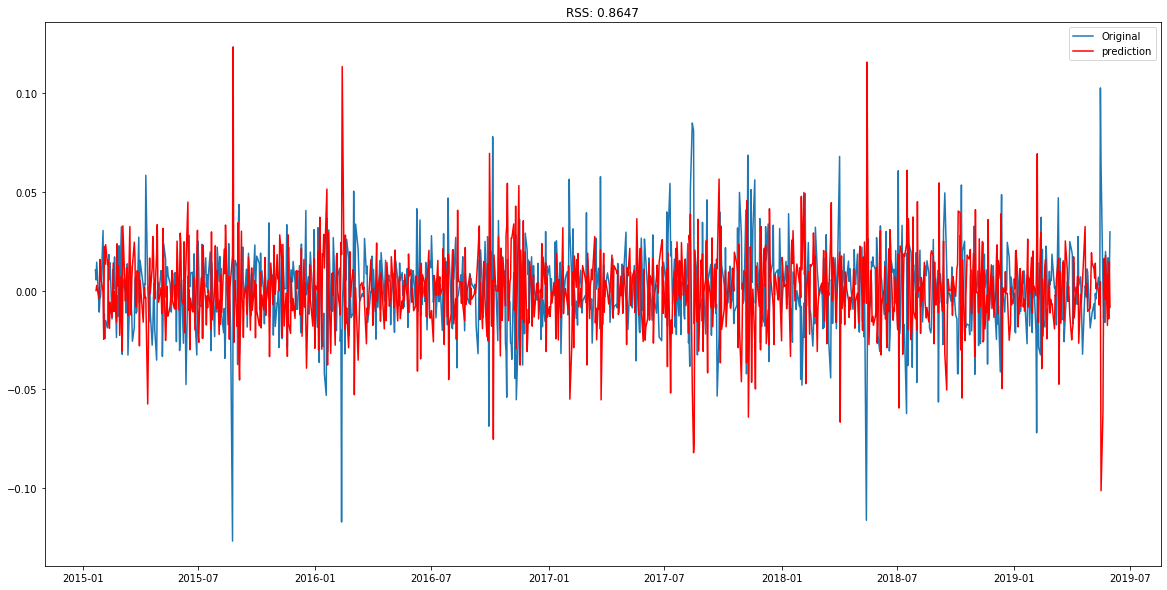

In [36]:
#MA MODEL
model = ARIMA(train_log_diff, order =(0, 1, 1))
results_MA = model.fit(disp =-1)
plt.plot(train_log_diff ,label ='Original')
plt.plot(results_MA.fittedvalues, color ='red' , label='prediction')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-train_log_diff).dropna()**2))
plt.legend(loc='best')
plt.show()

In [37]:
MA_predict=results_MA.predict(1078,1233)
MA_predict.shape

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


(156,)

In [38]:
MA_predict.index=valid_log.index
MA_predict

Date
2019-05-31   -0.027140
2019-06-03    0.000003
2019-06-04    0.000003
2019-06-06    0.000003
2019-06-07    0.000003
                ...   
2020-01-13    0.000003
2020-01-14    0.000003
2020-01-15    0.000003
2020-01-16    0.000003
2020-01-17    0.000003
Length: 156, dtype: float64

Plotting MA model


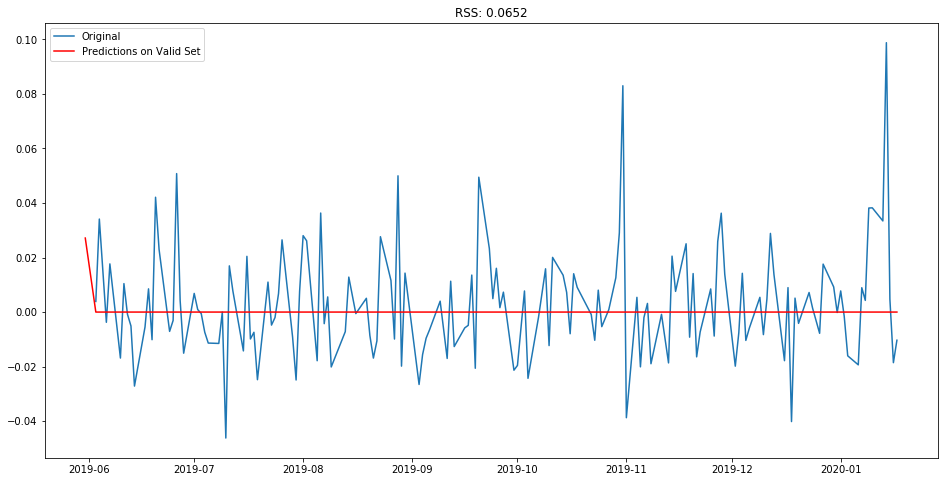

In [39]:
plt.figure(figsize=(16,8))
plt.plot(valid_log_diff, label ='Original')
plt.plot(-MA_predict, color='red',label = 'Predictions on Valid Set')
plt.title('RSS: %.4f'% sum((MA_predict-valid_log_diff).dropna()**2))
print('Plotting MA model')
plt.legend(loc ='best')

In [40]:
model_ma_1 = ARMA(train_log_diff[1:] ,order=(0,1))
results_ma_1 = model_ma_1.fit()
print(results_ma_1.summary())
#print("\nLLR TEST p-value = " +str(LLR_test(model_ma_1, model_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1077
Model:                     ARMA(0, 1)   Log Likelihood                2668.478
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5330.956
Time:                        15:26:28   BIC                          -5316.010
Sample:                             0   HQIC                         -5325.296
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.001      0.660      0.509      -0.001       0.002
ma.L1.Close    -0.0134      0.031     -0.434      0.665      -0.074       0.047
                                    Roots       

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [41]:
model_ma_2 = ARMA(train_log_diff[1:] ,order=(0,2))
results_ma_2 = model_ma_2.fit()
print(results_ma_2.summary())
print("\nLLR TEST p-value = " +str(LLR_test(model_ma_1, model_ma_2)))

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1077
Model:                     ARMA(0, 2)   Log Likelihood                2668.550
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5329.099
Time:                        15:26:28   BIC                          -5309.172
Sample:                             0   HQIC                         -5321.553
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.001      0.666      0.505      -0.001       0.002
ma.L1.Close    -0.0120      0.031     -0.391      0.696      -0.072       0.048
ma.L2.Close    -0.0120      0.032     -0.379    

In [42]:
model_ma_3 = ARMA(train_log_diff[1:] ,order=(0,3))
results_ma_3 = model_ma_3.fit()
print(results_ma_3.summary())
print("\nLLR TEST p-value = " +str(LLR_test(model_ma_2, model_ma_3)))

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1077
Model:                     ARMA(0, 3)   Log Likelihood                2669.988
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5329.975
Time:                        15:26:29   BIC                          -5305.065
Sample:                             0   HQIC                         -5320.542
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.001      0.635      0.526      -0.001       0.002
ma.L1.Close    -0.0091      0.031     -0.298      0.766      -0.069       0.051
ma.L2.Close    -0.0129      0.032     -0.407    

In [43]:
model_ma_4 = ARMA(train_log_diff[1:] ,order=(0,4))
results_ma_4 = model_ma_4.fit()
print(results_ma_4.summary())
print("\nLLR TEST p-value = " +str(LLR_test(model_ma_3, model_ma_4)))

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1077
Model:                     ARMA(0, 4)   Log Likelihood                2670.670
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5329.341
Time:                        15:26:29   BIC                          -5299.449
Sample:                             0   HQIC                         -5318.021
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.001      0.656      0.512      -0.001       0.002
ma.L1.Close    -0.0108      0.030     -0.354      0.723      -0.071       0.049
ma.L2.Close    -0.0132      0.030     -0.432    

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


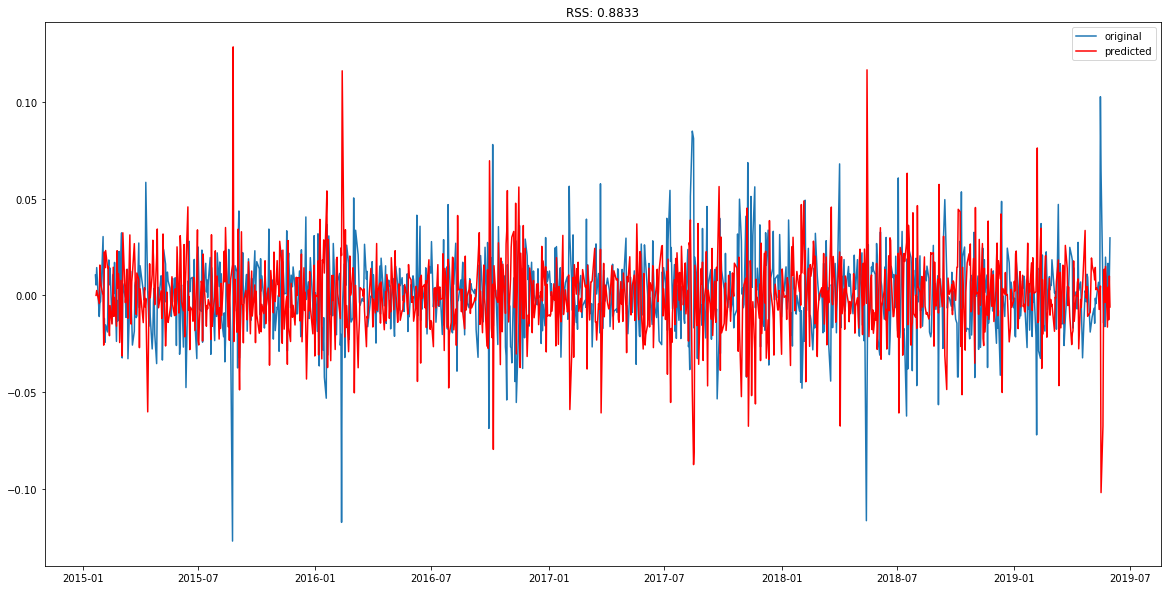

In [44]:
#ARIMA MODEL
model =ARIMA(train_log_diff, order=(2, 1, 2))
results_ARIMA = model.fit(disp = -1)
plt.plot(train_log_diff, label ='original')
plt.plot(results_ARIMA.fittedvalues , color ='red' , label ='predicted')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train_log_diff).dropna()**2))
plt.legend(loc ='best')
plt.show()

In [45]:
model_AR_1_I_1_MA_1 =ARIMA(train_log_diff, order=(1,1,1))
results_AR_1_I_1_MA_1 =model_AR_1_I_1_MA_1.fit()
print(results_AR_1_I_1_MA_1.summary())

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1077
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2663.969
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5319.938
Time:                        15:26:34   BIC                          -5300.011
Sample:                             1   HQIC                         -5312.392
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.269e-06   6.72e-06      0.338      0.736   -1.09e-05    1.54e-05
ar.L1.D.Close    -0.0095      0.031     -0.308      0.758      -0.070       0.051
ma.L1.D.Close    -0.9904      0.010   -1

In [46]:
model_AR_1_I_1_MA_2 =ARIMA(train_log_diff, order=(1,1,2))
results_AR_1_I_1_MA_2 =model_AR_1_I_1_MA_2.fit()
print(results_AR_1_I_1_MA_2.summary())
print("LLR TEST:" + str(LLR_test(model_AR_1_I_1_MA_1, model_AR_1_I_1_MA_2)))

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1077
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2667.399
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5324.798
Time:                        15:26:36   BIC                          -5299.888
Sample:                             1   HQIC                         -5315.364
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.426e-06   2.76e-06      0.517      0.605   -3.98e-06    6.83e-06
ar.L1.D.Close    -0.9566      0.029    -32.444      0.000      -1.014      -0.899
ma.L1.D.Close    -0.0206      0.022     

In [47]:
model_AR_2_I_1_MA_1 =ARIMA(train_log_diff, order=(2,1,1))
results_AR_2_I_1_MA_1 =model_AR_2_I_1_MA_1.fit()
print(results_AR_2_I_1_MA_1.summary())
print("LLR TEST:" + str(LLR_test(model_AR_1_I_1_MA_2, model_AR_1_I_1_MA_1)))

C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\namra\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1077
Model:                 ARIMA(2, 1, 1)   Log Likelihood                2664.682
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5319.363
Time:                        15:26:40   BIC                          -5294.454
Sample:                             1   HQIC                         -5309.930
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.48e-06   3.08e-06      0.481      0.631   -4.55e-06    7.51e-06
ar.L1.D.Close     0.0055      0.031      0.177      0.860      -0.056       0.067
ar.L2.D.Close    -0.0233      0.031     

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1077
Model:                 ARIMA(2, 1, 2)   Log Likelihood                2668.436
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 07 Jul 2020   AIC                          -5324.872
Time:                        15:26:42   BIC                          -5294.980
Sample:                             1   HQIC                         -5313.552
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.426e-06   2.76e-06      0.516      0.606   -3.99e-06    6.84e-06
ar.L1.D.Close    -0.9624      0.045    -21.311      0.000      -1.051      -0.874
ar.L2.D.Close    -0.0379      0.032     

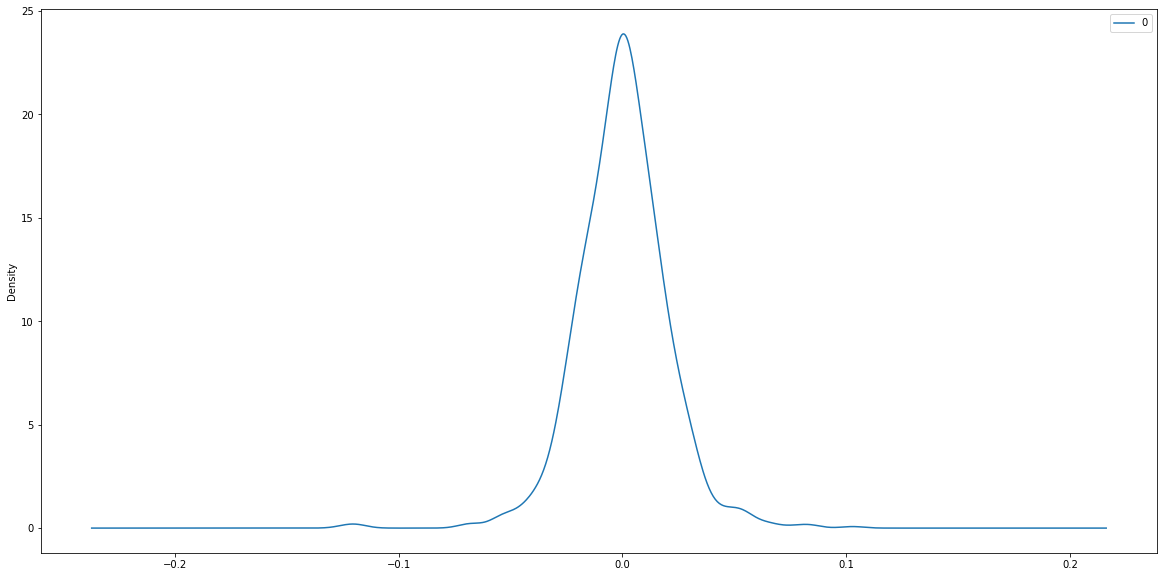

In [48]:
from pandas import DataFrame
print(results_ARIMA.summary())
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')
print(residuals.describe())

##You can measure whether the results of your model fit the underlying data by using the residual sum of squares (RSS) metric. A small RSS indicates that the model fits tightly to the data.
###Yet another approach to validate the ARIMA model appropriateness is by performing residual analysis.
###Print the results of the ARIMA model and plot the residuals. A density plot of the residual error values indicates a normal distribution centered around zero mean. Also, the residuals do not violate the assumptions of constant location and scale with most values in the range (-1,1).

In [4]:
from pmdarima.arima import auto_arima

data = df.sort_index(ascending = True , axis = 0)
train = data[:990]
valid = data[990:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model.fit(training)
forecast = model.predict(n_periods=244)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=5479.652, BIC=5504.074, Time=7.978 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=6161.835, BIC=6171.604, Time=0.072 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=5839.812, BIC=5859.350, Time=1.120 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=5477.695, BIC=5497.233, Time=4.713 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=6159.836, BIC=6164.721, Time=0.055 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=6162.611, BIC=6182.149, Time=0.833 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=5478.187, BIC=5507.494, Time=9.565 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse r

In [5]:
train.tail()

,Date,Open,High,Low,Last,Close,Total Trade,Volume
985,2019-01-14,211.75,214.25,209.65,212.55,213.50,10354,1036107
986,2019-01-15,213.10,215.25,212.60,214.50,214.30,6189,649313
987,2019-01-16,214.40,219.20,213.85,216.80,216.45,16518,1088457
988,2019-01-17,216.50,218.75,215.05,218.00,218.15,10325,1267904
989,2019-01-18,218.40,218.50,213.70,215.85,216.25,5577,771653


In [6]:
valid.head()

,Date,Open,High,Low,Last,Close,Total Trade,Volume
990,2019-01-21,216.2,216.95,210.00,210.1,210.50,9111,1005521
991,2019-01-22,209.7,212.55,209.20,212.2,212.10,6289,682384
992,2019-01-23,211.5,214.80,210.00,211.0,210.60,14354,937183
993,2019-01-24,212.1,212.65,209.45,210.8,210.80,20156,1059068
994,2019-01-25,211.0,212.05,206.05,207.5,207.05,11711,1723705


In [7]:
forecast

,Prediction
990,216.638375
991,216.782062
992,216.679616
993,216.654035
994,217.779255
...,...
1229,249.805339
1230,249.866278
1231,250.511945
1232,249.875431


In [8]:
print(model.aic())

5468.23671367008


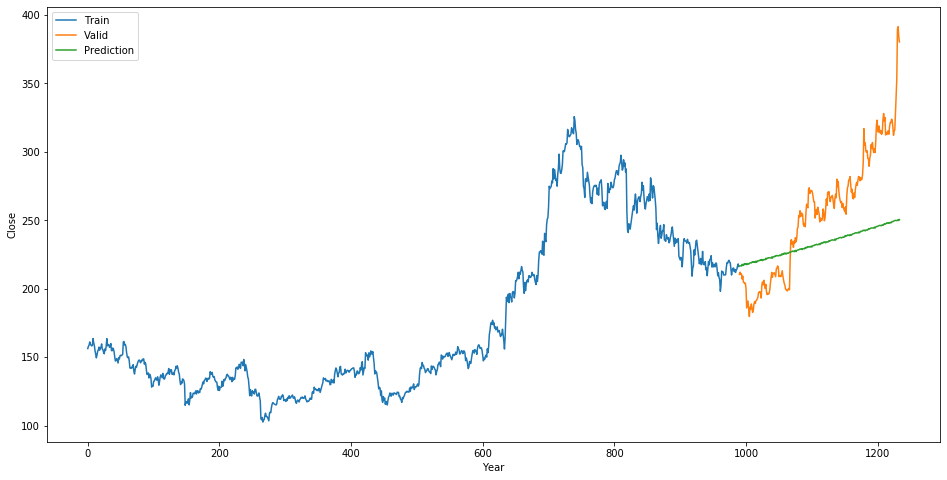

In [9]:
plt.figure(figsize=(16,8))
plt.plot(training, label='Train')
plt.plot(validation, label='Valid')
plt.plot(forecast, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Close')
plt.legend()
plt.show()

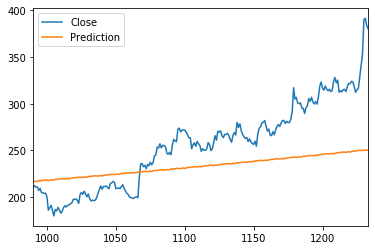

In [10]:
pd.concat([validation,forecast],axis=1).plot()

In [11]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
print(rms)

42.46978644414687


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  990
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -2727.118
Date:                              Thu, 09 Jul 2020   AIC                           5468.237
Time:                                      08:38:50   BIC                           5502.428
Sample:                                           0   HQIC                          5481.247
                                              - 990                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0060      0.017      0.348      0.728      -0.028       0.040
ar.L1         -1.9498      0.010   -203.406      0.000      -1.969      -1.931
ar.L2         -0.9906      0.009   -106.367      0.000      -1.009      -0.972
ma.L1          1.9380      0.015    127.389      0.000       1.908       1.968
ma.L2          0.9770      0.015     65.656      0.000       0.948       1.006
ma.S.L12      -0.9998      1.761     -0.568      0.570      -4.451       2.451
sigma2        14.7818     25.956      0.569      0.569     -36.092      65.655
===================================================================================
Ljung-Box (Q):                       45.13   Jarque-Bera (JB):              2083.75
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               4.44   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

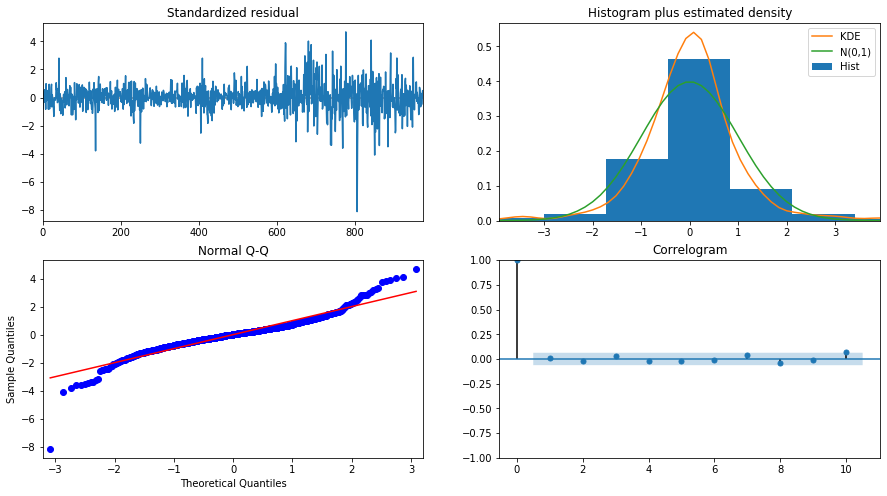

In [13]:
model.plot_diagnostics(figsize=(15,8))
plt.show()